In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn as skl
import sklearn.feature_selection as skl_feature_selection
import sklearn.impute as skl_impute
import sklearn.linear_model as skl_linear_model

In [ ]:
df_1 = pd.read_csv('/content/1.csv', sep=',', header=None)
df_2 = pd.read_csv('/content/2.csv', sep=',', header=None)
df_3 = pd.read_csv('/content/3.csv', sep=',', header=None)
df_4 = pd.read_csv('/content/4.csv', sep=',', header=None)

In [ ]:
df_1.tail(-1)
df_3.tail(-1)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,1,10.0,0.376,0.2622,0.5555,0.2837,0.1444,0.7606,0.1316,0.5048,...,0.4128,0.4043,0.6029,0.9818,0.771,0.596,0.9843,0.697,0.8146,3.0
2,2,1.0,0.8912,0.4076,0.8245,0.7026,0.7784,0.4193,0.0786,0.0406,...,0.5904,0.7597,0.162,0.3635,0.7204,0.8827,0.7251,0.0735,0.4344,3.0
3,2,2.0,0.6556,0.8445,0.9791,0.5888,0.5415,0.7938,0.48,0.8979,...,0.7482,0.5427,0.9124,0.3356,0.6929,0.2537,0.926,0.4013,0.3644,3.0
4,2,3.0,0.2383,0.1217,0.1959,0.9121,0.144,0.6303,0.5165,0.9884,...,0.0016,0.9053,0.824,0.6673,0.7639,0.2938,0.3643,0.3066,0.155,3.0
5,2,4.0,0.6486,0.9995,0.4086,0.5234,0.3496,0.7218,0.7616,0.4714,...,0.0313,0.4582,0.7783,0.4079,0.3772,0.4436,0.4096,0.2825,0.2164,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,5233,3.0,0.5716,0.3466,0.3608,0.2402,0.9529,0.7807,0.6099,0.7723,...,0.7857,0.2054,0.3224,0.3225,0.8511,0.4589,0.7075,0.6255,0.5187,3.0
14616,5233,4.0,0.9823,0.9596,0.8875,0.0388,0.4034,0.656,0.6105,0.7501,...,0.8355,0.7949,0.7256,0.4404,0.7742,0.5186,0.1749,0.9796,0.841,3.0
14617,5233,5.0,0.4462,0.8307,0.2999,0.1025,0.405,0.7673,0.0336,0.3646,...,0.1186,0.9202,0.8404,0.5427,0.6713,0.791,0.3269,0.4149,0.4654,3.0
14618,5233,6.0,0.7161,0.1891,0.984,0.891,0.1687,0.7737,0.2861,0.9482,...,0.3834,0.6017,0.0239,0.8503,0.7757,0.4038,0.9689,0.6958,0.2442,3.0


In [ ]:
frames = [df_1, df_2, df_3, df_4]

result = pd.concat(frames).reset_index(drop = True)

In [ ]:
result

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.7456,0.575,0.7947,0.4663,0.4303,0.3643,0.0558,0.133,0.0295,1.0
1,0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.5449,0.8531,0.6337,0.8807,0.256,0.0597,0.5751,0.7797,0.8544,1.0
2,0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.197,0.0971,0.2039,...,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816,1.0
3,0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.411,...,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748,1.0
4,0,6.0,0.9538,0.3029,0.4227,0.7774,0.5194,0.7531,0.4816,0.9918,...,0.204,0.1013,0.6044,0.957,0.8958,0.8006,0.5282,0.4132,0.4582,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,5229,6.0,0.3095,0.6843,0.996,0.6522,0.3761,0.025,0.2235,0.7859,...,0.9062,0.8106,0.7298,0.1951,0.3508,0.7454,0.4398,0.5748,0.6143,0.0
52341,5229,7.0,0.4162,0.6795,0.3208,0.9017,0.225,0.0817,0.2113,0.8581,...,0.3347,0.4278,0.1765,0.0179,0.9405,0.7314,0.8729,0.6998,0.41,0.0
52342,5229,8.0,0.0679,0.0506,0.1554,0.5077,0.5742,0.7185,0.8727,0.2025,...,0.4174,0.0965,0.7313,0.335,0.4126,0.1147,0.6697,0.7892,0.24,0.0
52343,5229,9.0,0.6364,0.6784,0.9202,0.5093,0.3782,0.279,0.526,0.3776,...,0.5307,0.1081,0.5129,0.7651,0.1531,0.2597,0.1825,0.2496,0.991,0.0


In [ ]:
def get_na_info(df):
    return (
        pd.DataFrame(dict(dtype=df.dtypes,
                          na_cnt=df.isna().sum(),
                          na_pct=df.isna().sum().div(len(df))
                              .mul(100).round(2)))
            .sort_values('na_pct')
    )

def print_mean_sem(values):
    import math
    mean = np.mean(values)
    sem = np.std(values) / math.sqrt(len(values))
    print(f"{mean:.4f} (SEM: {sem:.4f})")

def batches_of(seq, size=1000):
    batch = []
    for n, item in enumerate(seq, start=1):
        batch.append(item)
        if n % size == 0:
            yield batch
            batch = []
    if batch:
        yield batch

In [ ]:
def small_multiple_dists(
    cont: pd.DataFrame, cols=6, hue=None, tails=True,
    kind="hist",
):
    _offset = 2 if hue else 1
    rows = (len(cont.columns)-_offset) // cols + 1
    __, axes = plt.subplots(rows, cols, figsize=(20, rows*2))
    axes_ = axes.ravel()  # flatten; will not affect layout

    plt.tight_layout()
    sns.despine(left=True)
    for i, col in enumerate(cont.columns):
        if col == hue:
            continue
        ax = axes_[i]
        kwargs = {}
        if not tails:
            lim = (
                cont[col].quantile(0.025),
                cont[col].quantile(0.975))

        if kind == "hist":
            if not tails:
                kwargs["binrange"] = lim
            sns.histplot(data=cont, x=col, hue=hue,
                         ax=ax, **kwargs)
        elif kind == "kde":
            if not tails:
                kwargs["clip"] = lim
            sns.kdeplot(data=cont, x=col, hue=hue,
                        common_norm=False, ax=ax, **kwargs)
        else:
            raise ValueError(f"Unsupported kind: {kind}")

        ax.grid(False, axis="x")

def plot_corr_heatmap(corr):
    _figsize = (len(corr), len(corr))
    sns.heatmap(
        corr,
        vmin=-1, center=0, vmax=1,
        annot=True, fmt='.1f',
        square=True, cmap='coolwarm',
        mask=np.triu(np.ones_like(corr)),
        ax=plt.subplots(figsize=_figsize)[1])

In [ ]:
def plot_validation_curve(param_range, train_scores, valid_scores):
    (
        pd.DataFrame(dict(
                param_range=np.repeat(param_range, train_scores.shape[1]),
                train_score=np.ravel(train_scores),
                valid_score=np.ravel(valid_scores)))
            .pipe(pd.melt, id_vars='param_range',
                  value_vars=['train_score', 'valid_score'],
                  var_name='score_type', value_name='score')
            .pipe((sns.catplot, 'data'), x='param_range', y='score',
                  hue='score_type', style='score_type', aspect=3/2,
                  kind='point')
    )

In [ ]:
y = pd.DataFrame()
y

""


In [ ]:
result=result.tail(-1)


In [ ]:
result

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.7456,0.575,0.7947,0.4663,0.4303,0.3643,0.0558,0.133,0.0295,1.0
2,0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.5449,0.8531,0.6337,0.8807,0.256,0.0597,0.5751,0.7797,0.8544,1.0
3,0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.197,0.0971,0.2039,...,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816,1.0
4,0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.411,...,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748,1.0
5,0,6.0,0.9538,0.3029,0.4227,0.7774,0.5194,0.7531,0.4816,0.9918,...,0.204,0.1013,0.6044,0.957,0.8958,0.8006,0.5282,0.4132,0.4582,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52344,5229,6.0,0.3095,0.6843,0.996,0.6522,0.3761,0.025,0.2235,0.7859,...,0.9062,0.8106,0.7298,0.1951,0.3508,0.7454,0.4398,0.5748,0.6143,0.0
52345,5229,7.0,0.4162,0.6795,0.3208,0.9017,0.225,0.0817,0.2113,0.8581,...,0.3347,0.4278,0.1765,0.0179,0.9405,0.7314,0.8729,0.6998,0.41,0.0
52346,5229,8.0,0.0679,0.0506,0.1554,0.5077,0.5742,0.7185,0.8727,0.2025,...,0.4174,0.0965,0.7313,0.335,0.4126,0.1147,0.6697,0.7892,0.24,0.0
52347,5229,9.0,0.6364,0.6784,0.9202,0.5093,0.3782,0.279,0.526,0.3776,...,0.5307,0.1081,0.5129,0.7651,0.1531,0.2597,0.1825,0.2496,0.991,0.0


In [ ]:
result.describe().style.format(precision=4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
count,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345,52345
unique,5235,10,9948,9943,9947,9938,9952,9949,9939,9952,9950,9949,9952,9945,9942,9941,9937,9953,9948,9955,9948,9958,9960,9955,9958,9947,9951,4
top,2262,2.0,0.3337,0.7868,0.4611,0.8478,0.9677,0.0518,0.4185,0.1605,0.9411,0.5504,0.139,0.4897,0.6651,0.7076,0.5556,0.6416,0.1611,0.5326,0.416,0.0562,0.4825,0.9068,0.6527,0.7459,0.7397,3.0
freq,10,5235,17,17,17,18,16,15,16,16,15,16,15,15,17,19,16,17,16,15,17,15,15,17,16,16,16,14619


In [ ]:
result[0]

0           0
1           0
2           0
3           0
4           0
         ... 
52340    5229
52341    5229
52342    5229
52343    5229
52344    5229
Name: 0, Length: 52345, dtype: object

In [ ]:
y['SampleID'] = result[0]

y['State'] = result[27]

In [ ]:
y

,SampleID,State
0,0,1.0
1,0,1.0
2,0,1.0
3,0,1.0
4,0,1.0
...,...,...
52340,5229,0.0
52341,5229,0.0
52342,5229,0.0
52343,5229,0.0


In [ ]:
result = result.drop([27], axis=1)

In [ ]:
df_1

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
1,0,1.0,0.4337,0.7431,0.939,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
2,0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.575,0.7947,0.4663,0.4303,0.3643,0.0558,0.133,0.0295
3,0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.256,0.0597,0.5751,0.7797,0.8544
4,0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.197,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
5,0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.411,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11518,5234,2.0,0.0001,0.5861,0.9558,0.0581,0.346,0.8378,0.3595,0.4915,...,0.5524,0.5331,0.7554,0.7975,0.5522,0.2521,0.9704,0.4642,0.6211,0.5454
11519,5234,3.0,0.7255,0.2268,0.7441,0.8172,0.4259,0.3025,0.8174,0.9607,...,0.1685,0.8869,0.2147,0.1167,0.3714,0.3948,0.6691,0.8533,0.1502,0.4154
11520,5234,4.0,0.4054,0.3511,0.3857,0.8696,0.9721,0.8799,0.5439,0.1477,...,0.9516,0.7386,0.0762,0.1355,0.5368,0.4226,0.2527,0.4237,0.586,0.3694
11521,5234,5.0,0.7439,0.9808,0.0385,0.5972,0.0798,0.4027,0.9514,0.3796,...,0.6749,0.9193,0.9629,0.7511,0.3512,0.0454,0.7027,0.0897,0.1216,0.7869


In [ ]:
y.describe()

,SampleID,State
count,52345,52345
unique,5235,4
top,2262,3.0
freq,10,14619


In [ ]:
df = pd.read_csv('/content/train.csv', sep=',', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0,1.0,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
1,0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.5750,0.7947,0.4663,0.4303,0.3643,0.0558,0.1330,0.0295
2,0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.2560,0.0597,0.5751,0.7797,0.8544
3,0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.1970,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
4,0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.4110,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25121,2283,9.0,0.7164,0.5744,0.1996,0.6964,0.4741,0.5438,0.4233,0.6209,...,0.7151,0.7561,0.8085,0.2463,0.1503,0.9735,0.0498,0.4612,0.7787,0.7463
25122,2283,10.0,0.0214,0.8792,0.8980,0.9968,0.7529,0.8854,0.7132,0.3273,...,0.5365,0.8204,0.6492,0.5126,0.5590,0.6153,0.1765,0.2640,0.3726,0.4228
25123,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25124,2284,1.0,0.3630,0.3461,0.4213,0.7730,0.1248,0.1163,0.7431,0.9528,...,0.7092,0.6808,0.5109,0.4909,0.0519,0.5674,0.9762,0.8210,0.1654,0.4888


In [ ]:
y = pd.DataFrame()

In [ ]:
y['SampleID'] = df[0]
y['State'] = df[27]

KeyError: ignored

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


In [ ]:
test = pd.read_csv('/content/test.csv', sep=',', header=None)
test

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,50000,1,0.3786,0.7031,0.0734,0.0492,0.8328,0.9048,0.7850,0.9979,...,0.6897,0.9130,0.5681,0.0129,0.4369,0.5533,0.2384,0.4805,0.3959,0.4756
1,50000,2,0.0871,0.3716,0.1444,0.4848,0.8051,0.6569,0.8121,0.5083,...,0.6067,0.1750,0.3267,0.1499,0.4746,0.2572,0.7884,0.3364,0.8252,0.8013
2,50000,3,0.7733,0.3273,0.0397,0.2026,0.7231,0.4640,0.2385,0.0435,...,0.2943,0.5956,0.4769,0.8894,0.8833,0.0786,0.4448,0.0071,0.4052,0.5436
3,50000,4,0.4817,0.6624,0.3319,0.7669,0.4364,0.1332,0.4890,0.7637,...,0.4996,0.2766,0.4083,0.9838,0.5823,0.3014,0.2781,0.1267,0.7782,0.1162
4,50000,5,0.0100,0.8568,0.5611,0.0171,0.2108,0.1046,0.4475,0.8220,...,0.2412,0.4066,0.2261,0.1200,0.8346,0.3691,0.5683,0.1112,0.7261,0.5521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50999,6,0.5563,0.0273,0.4050,0.0035,0.8710,0.3533,0.8382,0.5167,...,0.6842,0.8704,0.1593,0.1494,0.6192,0.2081,0.4659,0.8334,0.6913,0.2214
9996,50999,7,0.0702,0.7417,0.8893,0.3615,0.6888,0.5658,0.9178,0.6649,...,0.1328,0.3443,0.7526,0.0556,0.8064,0.5836,0.7398,0.6256,0.6917,0.8379
9997,50999,8,0.1935,0.8997,0.3039,0.9757,0.5910,0.5253,0.0459,0.3327,...,0.0930,0.1710,0.2240,0.8013,0.1723,0.4518,0.9341,0.5166,0.2043,0.9384
9998,50999,9,0.2718,0.7367,0.6270,0.8462,0.4284,0.4649,0.0397,0.3281,...,0.3151,0.1197,0.4840,0.5379,0.7549,0.3839,0.6309,0.8746,0.6079,0.4322


In [ ]:

test.describe().style.format(precision=4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,50499.5000,5.5000,0.4982,0.5025,0.5036,0.5004,0.4958,0.4994,0.5010,0.4984,0.4990,0.5020,0.5020,0.5025,0.4991,0.4945,0.4996,0.4997,0.4981,0.4991,0.5053,0.4973,0.4954,0.5025,0.4999,0.4997,0.4998
std,288.6894,2.8724,0.2895,0.2888,0.2881,0.2892,0.2893,0.2907,0.2890,0.2898,0.2882,0.2887,0.2901,0.2876,0.2891,0.2887,0.2888,0.2887,0.2889,0.2886,0.2883,0.2881,0.2903,0.2849,0.2881,0.2885,0.2890
min,50000.0000,1.0000,0.0003,0.0001,0.0006,0.0000,0.0000,0.0002,0.0001,0.0000,0.0000,0.0001,0.0000,0.0000,0.0003,0.0001,0.0000,0.0001,0.0000,0.0000,0.0002,0.0001,0.0000,0.0000,0.0001,0.0000,0.0001
25%,50249.7500,3.0000,0.2457,0.2523,0.2548,0.2492,0.2443,0.2467,0.2505,0.2471,0.2485,0.2532,0.2503,0.2529,0.2447,0.2424,0.2494,0.2506,0.2465,0.2527,0.2566,0.2439,0.2446,0.2601,0.2538,0.2506,0.2518
50%,50499.5000,5.5000,0.4978,0.5000,0.5112,0.5002,0.4934,0.4994,0.5038,0.4992,0.4963,0.5015,0.5025,0.5007,0.4975,0.4923,0.4975,0.5000,0.4930,0.4955,0.5071,0.4975,0.4908,0.5018,0.4969,0.4988,0.4988
75%,50749.2500,8.0000,0.7507,0.7539,0.7539,0.7525,0.7474,0.7522,0.7514,0.7500,0.7495,0.7562,0.7545,0.7512,0.7471,0.7474,0.7487,0.7501,0.7490,0.7462,0.7565,0.7462,0.7489,0.7495,0.7518,0.7485,0.7494
max,50999.0000,10.0000,0.9999,0.9999,0.9999,0.9997,0.9999,1.0000,0.9997,0.9998,1.0000,0.9999,0.9999,0.9997,0.9999,1.0000,1.0000,0.9998,0.9997,0.9999,1.0000,0.9994,1.0000,0.9999,0.9998,0.9997,0.9999


In [ ]:
class PreGroupKFold(skl.model_selection.GroupKFold):
    """Supports specifying groups at init"""
    def __init__(self, n_splits=5, groups=None):
        if groups is None:
            raise ValueError("arg 'groups' not specified")
        self.groups = groups
        super().__init__(n_splits=n_splits)

    def split(self, X, y=None, groups=None):
        return super().split(X, y, self.groups)

In [ ]:
cv = skl.model_selection.RepeatedStratifiedKFold(n_splits=3, n_repeats=3)
gkf_cv = skl.model_selection.GroupKFold(n_splits=3)

# balanced classes, stratified k-fold should be less useful
sgkf_cv = skl.model_selection.StratifiedGroupKFold(n_splits=3)

cv_groups = result[0].drop_duplicates().to_frame().set_index(0)
pgkf_cv = PreGroupKFold(n_splits=3, groups=cv_groups)

In [ ]:
result.columns = ["SampleID", "Timepoint", "Sensor1", "Sensor2","Sensor3","Sensor4","Sensor5","Sensor6","Sensor7","Sensor8","Sensor9","Sensor10","Sensor11","Sensor12","Sensor13","Sensor14","Sensor15","Sensor16","Sensor17","Sensor18","Sensor19","Sensor20","Sensor21","Sensor22","Sensor23","Sensor24","Sensor25" ]
test.columns = ["SampleID", "Timepoint", "Sensor1", "Sensor2","Sensor3","Sensor4","Sensor5","Sensor6","Sensor7","Sensor8","Sensor9","Sensor10","Sensor11","Sensor12","Sensor13","Sensor14","Sensor15","Sensor16","Sensor17","Sensor18","Sensor19","Sensor20","Sensor21","Sensor22","Sensor23","Sensor24","Sensor25" ]

In [ ]:
def to_mvp_X(raw):
    return (
        raw.filter(regex=r'^(SampleID|Sensor)')
            .groupby("SampleID")
            .mean()
    #         .merge(raw_y, on="sequence").pipe(get_na_info)  # no NA, good merge
    )

X_mvp = result.pipe(to_mvp_X)
X_mvp_te = test.pipe(to_mvp_X)
y_mvp = y['State']

X_mvp.shape, y_mvp.shape, X_mvp_te.shape

/usr/local/lib/python3.9/dist-packages/pandas/core/common.py:471: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return func(obj, *args, **kwargs)


((5235, 0), (52345,), (1000, 25))

In [ ]:
print(pd.__version__)


1.3.5


In [ ]:
type(result[0].drop_duplicates().values.tolist())

KeyError: ignored

In [ ]:
from pandas.core.internals.construction import treat_as_nested
SENSOR_COLS = result.filter(regex=r'^Sensor').columns

def calc_iqr(seq):
    q1, q3 = pd.Series(seq).quantile([.25, .75])
    return q1, q3

def calc_box_whis(iqr, coef=1.5):
    q1, q3 = iqr
    whis_len = (q3-q1)*coef
    lo = q1 - whis_len
    hi = q3 + whis_len
    return lo, hi

eda_tr = result
eda_te = test
eda_bo = pd.concat([
    eda_tr.assign(test=False),
    eda_te.assign(test=True),
])
eda_tr.shape, eda_te.shape, eda_bo.shape

((52345, 27), (10000, 27), (62345, 28))

<AxesSubplot:>

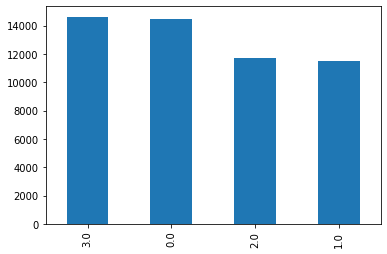

In [ ]:
y['State'].value_counts().plot(kind='bar')

In [ ]:
eda_bo.describe().style.format(precision=4)

,SampleID,Timepoint,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Sensor22,Sensor23,Sensor24,Sensor25,test
count,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345,62345
unique,6235,20,16180,16275,16267,16293,16268,16218,16268,16298,16283,16282,16235,16252,16270,16284,16270,16268,16272,16292,16309,16259,16231,16265,16228,16222,16297,2
top,3991,2.0,0.3337,0.7868,0.4611,0.8478,0.9677,0.0518,0.4185,0.1605,0.719,0.5504,0.7543,0.4897,0.9674,0.7076,0.5556,0.6416,0.1611,0.3389,0.416,0.3103,0.4825,0.9068,0.6527,0.7459,0.7397,False
freq,10,5235,17,17,17,18,16,15,16,16,15,16,15,15,17,19,16,17,16,15,17,15,15,17,16,16,16,52345


In [ ]:
(
    eda_tr.reset_index().drop_duplicates(["SampleID"]).value_counts()
#         .pipe((sns.histplot, "data"))
)

index  SampleID  Timepoint  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  Sensor7  Sensor8  Sensor9  Sensor10  Sensor11  Sensor12  Sensor13  Sensor14  Sensor15  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  Sensor21  Sensor22  Sensor23  Sensor24  Sensor25
0      0         2.0        0.7859   0.1925   0.9024   0.8108   0.2016   0.9649   0.2445   0.8934   0.9039   0.9474    0.7457    0.6983    0.2097    0.3358    0.4028    0.4259    0.7456    0.575     0.7947    0.4663    0.4303    0.3643    0.0558    0.133     0.0295      1
23286  9         2.0        0.8561   0.3045   0.0998   0.5691   0.5888   0.1149   0.4207   0.4151   0.5759   0.4441    0.5581    0.3746    0.4713    0.7566    0.8244    0.6269    0.8846    0.045     0.4007    0.5269    0.3871    0.6346    0.4979    0.8803    0.2907      1
23483  86        1.0        0.5857   0.116    0.0606   0.0317   0.0305   0.8432   0.5503   0.7081   0.648    0.7257    0.1936    0.6979    0.3809    0.6608    0.2005    0.9036    0.7597 

<AxesSubplot:ylabel='Count'>

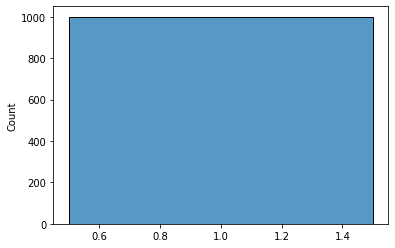

In [ ]:
(
    eda_te.reset_index().drop_duplicates(["SampleID"]).value_counts()
        .pipe((sns.histplot, "data"))
)

In [ ]:
df_2

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,1,1.0,0.4013,0.6779,0.9426,0.3566,0.3919,0.0981,0.9805,0.5617,...,0.9158,0.1142,0.1561,0.3578,0.348,0.9472,0.4583,0.9891,0.6206,2.0
2,1,2.0,0.0451,0.998,0.0685,0.7227,0.6657,0.2293,0.124,0.2924,...,0.1631,0.0425,0.3357,0.4578,0.23,0.0897,0.3224,0.3442,0.2458,2.0
3,1,3.0,0.6802,0.641,0.1418,0.1385,0.6301,0.7111,0.1836,0.5769,...,0.168,0.2971,0.8183,0.3627,0.26,0.2846,0.5258,0.3026,0.5692,2.0
4,1,4.0,0.9324,0.5326,0.6589,0.2548,0.8256,0.8534,0.935,0.4666,...,0.865,0.3412,0.9377,0.3999,0.4195,0.3462,0.5679,0.7166,0.1132,2.0
5,1,5.0,0.8794,0.9767,0.3466,0.354,0.228,0.8646,0.2864,0.7606,...,0.0471,0.8735,0.5509,0.6695,0.257,0.5096,0.5345,0.547,0.4473,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,5232,4.0,0.2591,0.3214,0.0768,0.5396,0.7609,0.4812,0.1468,0.4576,...,0.8582,0.4439,0.0994,0.651,0.9766,0.5332,0.0954,0.1431,0.7999,2.0
11744,5232,5.0,0.7923,0.1952,0.3834,0.8634,0.2556,0.8239,0.0713,0.5258,...,0.5606,0.1542,0.7919,0.0436,0.6024,0.1066,0.9017,0.0463,0.206,2.0
11745,5232,6.0,0.5015,0.9716,0.7392,0.5456,0.1147,0.4879,0.338,0.2587,...,0.2755,0.8243,0.3852,0.9685,0.6385,0.3926,0.5291,0.7928,0.1333,2.0
11746,5232,7.0,0.5215,0.344,0.1886,0.372,0.3902,0.3946,0.8734,0.3619,...,0.1472,0.0346,0.9749,0.136,0.5281,0.7049,0.3602,0.3524,0.0388,2.0


In [ ]:
df_1=df_1.tail(-1)
df_2=df_2.tail(-1)
df_3=df_3.tail(-1)
df_4=df_4.tail(-1)

In [ ]:
correlation=result.corr()
#plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

ValueError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
GROUPED_SENSOR_NUMS = [1, 2, 3, 4 , 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
GROUPED_SENSOR_COLS = [
    f"Sensor_{n:02}" for n in GROUPED_SENSOR_NUMS
]

def list_random_seq_ids(n, state, subj=None):
    row_filters = y['State'] == state
    if subj:
        subj_seq_ids = result[result['SampleID'] == subj].drop_duplicates()
        row_filters &= y.isin(subj_seq_ids)

    return (y[row_filters].sample(n))

def list_random_seqs(n, state, subj=None):
    seq_id = list_random_seq_ids(n, state=state, subj=subj)
    return eda_tr.loc[seq_id].assign(state=state).reset_index()

neg_seq = list_random_seqs(1000, state=0)
pos_seq = list_random_seqs(1000, state=1)

ValueError: ignored

In [ ]:
df_4

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,6,5.0,0.7305,0.4294,0.5846,0.8909,0.8829,0.7973,0.6044,0.2302,...,0.2827,0.1162,0.3238,0.905,0.2084,0.2688,0.3755,0.9474,0.0612,0.0
2,6,6.0,0.5925,0.9305,0.8022,0.6491,0.8066,0.754,0.3283,0.236,...,0.9898,0.9611,0.2367,0.297,0.5353,0.9938,0.5797,0.6516,0.2664,0.0
3,6,7.0,0.4847,0.8088,0.4839,0.8089,0.705,0.5451,0.3501,0.5842,...,0.6434,0.4735,0.268,0.9413,0.5229,0.8591,0.9311,0.484,0.0957,0.0
4,6,8.0,0.2281,0.9681,0.0383,0.7566,0.5684,0.3047,0.19,0.326,...,0.9549,0.6287,0.471,0.5305,0.9662,0.9153,0.1227,0.4397,0.1833,0.0
5,6,9.0,0.064,0.9625,0.9911,0.9439,0.3953,0.0869,0.1208,0.3634,...,0.1863,0.3474,0.3129,0.7503,0.8748,0.5076,0.7052,0.4522,0.9273,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14454,5229,6.0,0.3095,0.6843,0.996,0.6522,0.3761,0.025,0.2235,0.7859,...,0.9062,0.8106,0.7298,0.1951,0.3508,0.7454,0.4398,0.5748,0.6143,0.0
14455,5229,7.0,0.4162,0.6795,0.3208,0.9017,0.225,0.0817,0.2113,0.8581,...,0.3347,0.4278,0.1765,0.0179,0.9405,0.7314,0.8729,0.6998,0.41,0.0
14456,5229,8.0,0.0679,0.0506,0.1554,0.5077,0.5742,0.7185,0.8727,0.2025,...,0.4174,0.0965,0.7313,0.335,0.4126,0.1147,0.6697,0.7892,0.24,0.0
14457,5229,9.0,0.6364,0.6784,0.9202,0.5093,0.3782,0.279,0.526,0.3776,...,0.5307,0.1081,0.5129,0.7651,0.1531,0.2597,0.1825,0.2496,0.991,0.0


In [ ]:
def agg_mad(ser):
    return ser.mad()

def agg_skew(ser: pd.Series):
    return ser.skew()

def agg_kurt(ser: pd.Series):
    return ser.kurtosis()

def coefficient_of_variation(x):
    mean = np.mean(x)
    if mean != 0:
        return np.std(x) / mean
    else:
        return np.nan

In [ ]:
N_COMPONENTS = 2
ICA_COLS = [f"ica_{i}" for i in range(N_COMPONENTS)]
SELECTED_SENSOR_COLS = GROUPED_SENSOR_COLS[6:]
WEAKCORR_SENSOR_COLS = GROUPED_SENSOR_COLS[4:6]

def _standard_scale(df: pd.DataFrame):
    scaler = skl.preprocessing.StandardScaler()
    scaled = pd.DataFrame(
        scaler.fit_transform(df.drop(columns=["SampleID", "Timepoint"])),
        index=df.index,
        columns=df.columns.difference(["SampleID", "Timepoint"]),
    )

    seq_step = df['Timepoint']

    return pd.concat([scaled, seq_step], axis=1)

def _run_ica(df: pd.DataFrame):
    ica = skl.decomposition.FastICA(
        n_components=N_COMPONENTS,
        max_iter=500, random_state=RANDOM_STATE)

    comp = pd.DataFrame(
        ica.fit_transform(df),
        index=df.index,
        columns=ICA_COLS,
    )
    return comp

In [ ]:
def create_ica_feats(df, cols):
    return (
        df[cols+["SampleID", "Timepoint"]]
            .reset_index()
            .groupby("SampleID").apply(_standard_scale)
            .set_index(["Timepoint"])
            .pipe(_run_ica)
    )


def create_ica_agg_feats(df):
    df = df.copy()
    df = (
        df[ICA_COLS]
            .agg([agg_mad,
                  "min", "max", "std", "mean",
                  agg_skew,
                  agg_kurt,
                  coefficient_of_variation])
    )
    df.columns = ["_".join(levels) for levels in df.columns]
    return df

In [ ]:
def _simple_impute(df: pd.DataFrame, imputer, te=False):
    if te:
        data = imputer.transform(df)
    else:
        data = imputer.fit_transform(df)

    return pd.DataFrame(
        data,
        index=df.index,
        columns=df.columns,
    )


In [ ]:
def _simple_impute(df: pd.DataFrame, imputer, te=False):
    if te:
        data = imputer.transform(df)
    else:
        data = imputer.fit_transform(df)

    return pd.DataFrame(
        data,
        index=df.index,
        columns=df.columns,
    )

def create_sensor2_flatline_nf(df):
    return (df['Sensor2'].apply(lambda s: s.min() == s.max())
                .astype(int)
                .rename("sensor_02_flatline")
           )

def create_more_agg_feats(df):
    tmp = (
        df[SENSOR_COLS]
            .agg([agg_mad])
    )
    tmp.columns = ["_".join(levels) for levels in tmp.columns]
    return tmp


In [ ]:
def create_sensor4_10_mad(df):
    return ((df['Sensor4']+df['Sensor10'])
                .mad()
                .rename("sensor4_10_mad")
           )

def feat_eng_raw(df):
    return pd.concat([df.pipe(create_sensor2_flatline_nf),
                      df.pipe(create_more_agg_feats),
                      df.pipe(create_sensor4_10_mad),
                     ], axis=1)

def feat_eng_ica(df):
    return pd.concat([df.pipe(create_ica_feats, cols=SELECTED_SENSOR_COLS)
                          .pipe(create_ica_agg_feats).add_prefix("medcorr_"),
                      df.pipe(create_ica_feats, cols=WEAKCORR_SENSOR_COLS)
                          .pipe(create_ica_agg_feats).add_prefix("wkcorr_"),
                     ], axis=1)

def drop_agg_feats(df):
    feats_to_drop = (
        AGG_FEATS_TO_DROP_DUE_TO_NA
        + df.filter(regex="Sensor.*length$").columns.tolist()  # constant
        + df.filter(regex="Sensor.*count$").columns.tolist()
         )
    return df.drop(columns=feats_to_drop)


def feat_eng(df):
    return (df.pipe(drop_agg_feats))

In [ ]:
%%time
imputer = skl_impute.SimpleImputer()

ica_feat_bo = (
    pd.concat([eda_tr, eda_te])
        .pipe(feat_eng_ica)
)

X_eng = (
    pd.concat([X_morin_aggs,
               eda_tr.pipe(feat_eng_raw),
               ica_feat_bo.loc[eda_tr.index.drop_duplicates()],
              ], axis=1)
        .pipe(feat_eng)
        .pipe(_simple_impute, imputer=imputer)
)
X_eng_te = (
    pd.concat([X_morin_aggs_te,
               eda_te.pipe(feat_eng_raw),
               ica_feat_bo.loc[eda_te.index.drop_duplicates()],
              ], axis=1)
        .pipe(feat_eng)
        .pipe(_simple_impute, imputer=imputer, te=True)
)

y_eng = y_aggs

X_eng.shape, X_eng_te.shape

KeyError: ignored

In [ ]:
%%time
gbm_eng = lgb.LGBMClassifier()

scores = skl.model_selection.cross_val_score(
    gbm_eng, X_eng, y,
    scoring=SCORING, cv=gkf_cv, groups=cv_groups)

print("GBM, feat eng AUC:")
print_mean_sem(scores)

NameError: ignored